# Lab Assignment 2 – Elizabeth Ngiam
### 210001976
[Repository](https://github.com/wiselkie/Assignment2_Repo)

### Part 1: Python Basics

In [1]:
# Task 1: Creating an If...Else statement for numerical division
x = 29
if x / 3 == True:
    print(str(x) + " is divisible by 3.")
else:
    print(str(x) + " is not divisible by 3.")

29 is not divisible by 3.


In [2]:
# Task 2: Creating an If...Else statement for list comprehension
mylist = ["apple", "orange", "pear", "kiwi", "strawberry"]
y = 'Mango'
if y in mylist:
    print(str(y) + " is acceptable.")
else:
    print(str(y) + " is not acceptable.")

Mango is not acceptable.


In [3]:
# Task 3: Creating a function to calculate the distance between two coordinates using the haversine formula
## The input parameters as a pair of coordinates in two lists
Singapore = [1.290270, 103.851959]
StAndrews = [56.33871, -2.79902]

from math import *

# Haversine formula
def haversine(lat1,lon1,lat2,lon2):
    r = 6371      # Radius of earth in kilometers
  
    dlon = radians(lon2 - lon1)     # Convert decimal degrees to radians
    dlat = radians(lat2 - lat1)

    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2

    c = 2 * asin(sqrt(a)) 

    return c * r

x = haversine(1.290270,103.851959,56.33871,-2.79902)
print(x)

8564.878499508728


### Part 2: Pandas and NumPy

In [4]:
import numpy as np
import pandas as pd

In [5]:
# Creating a DataFrame and viewing the first 5 rows
trees = pd.read_csv('/arcgis/home/portland_park_trees.csv', header=0)
trees.columns =[column.replace(" ", "_") for column in trees.columns]
trees.head(5)

,fid,OBJECTID,Inventory_,Species,DBH,Condition,TreeHeight,CrownWidth,CrownWid_1,CollectedB,...,Genus,Common_nam,Genus_spec,Functional,Size,Native,Edible,Nuisance,Origin,Species_fa
0,1,426,2017/05/09,PSME,37.4,Fair,105.0,44.0,57.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
1,2,427,2017/05/09,PSME,32.5,Fair,94.0,49.0,45.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
2,3,428,2017/05/09,CRLA,9.7,Fair,23.0,28.0,27.0,staff,...,Crataegus,Lavalle hawthorn,Crataegus x lavalleei,BD,S,No,NaN,NaN,North America - a hybrid between a Mexican and...,"Like most hawthorns, the tree has stout thorns..."
3,4,429,2017/05/09,QURU,10.3,Poor,28.0,38.0,31.0,staff,...,Quercus,northern red oak,Quercus rubra,BD,L,No,NaN,NaN,North America - eastern Canada and eastern USA...,Acorns take two years to mature and are an imp...
4,5,430,2017/05/09,PSME,33.2,Fair,102.0,43.0,44.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...


In [6]:
# Question 1: How many trees are of the Quercus or Acer genus?
## Number of Quercus trees
quercus = trees.query('Genus=="Quercus"')["Genus"]
print(quercus.head(10))
print('')
print(str(len(quercus)) + ' trees are of the Quercus genus.')
print('')

## Number of Acer trees
acer = trees.query('Genus=="Acer"')["Genus"]
print(acer.head(10))
print('')
print(str(len(acer)) + ' trees are of the Acer genus.')
print('')

## Total number of trees that are of the Quercus or Acer genus
quercus_acer = trees[(trees["Genus"]=="Quercus") + (trees["Genus"]=="Acer")][["Genus"]]
print(quercus_acer.head(10))
print('')
print(str(len(quercus_acer)) + ' trees are of the Quercus or Acer genus.')

3      Quercus
11     Quercus
54     Quercus
86     Quercus
96     Quercus
145    Quercus
173    Quercus
181    Quercus
188    Quercus
190    Quercus
Name: Genus, dtype: object

2089 trees are of the Quercus genus.

24    Acer
25    Acer
30    Acer
31    Acer
41    Acer
42    Acer
43    Acer
46    Acer
47    Acer
48    Acer
Name: Genus, dtype: object

3586 trees are of the Acer genus.

      Genus
3   Quercus
11  Quercus
24     Acer
25     Acer
30     Acer
31     Acer
41     Acer
42     Acer
43     Acer
46     Acer

5675 trees are of the Quercus or Acer genus.


In [7]:
# Question 2: How many trees are of the Quercus or Acer genus and have a DBH larger than 50 inches?
## Perform a DataFrame query that combines the requirements for genus (Quercus or Acer) and DBH (more than 50 inches)
quercus_acer_dbh = trees[((trees["Genus"]=="Quercus") + (trees["Genus"]=="Acer")) & (trees["DBH"]>50)][["Genus","DBH"]]
print(quercus_acer_dbh.head(10))
print(' ')
print(str(len(quercus_acer_dbh)) + ' trees of the Quercus or Acer genus have a DBH larger than 50 inches.')

        Genus   DBH
127      Acer  50.5
152      Acer  50.5
154      Acer  52.7
162      Acer  56.3
593      Acer  50.9
595      Acer  53.0
680      Acer  52.7
814      Acer  53.5
839      Acer  53.5
1701  Quercus  51.5
 
124 trees of the Quercus or Acer genus have a DBH larger than 50 inches.


In [8]:
# Question 3: Which genus has the highest mean DBH of the following genera: Quercus, Acer, or Fraxinus?
## Obtain summary statistics (specifically the mean) for each group (here, it is grouped by Genus)
trees_stats = pd.DataFrame()
trees_stats["Mean"] = trees.groupby("Genus")['DBH'].mean()
print(' ')

## Index with labels to show only the genera required (Quercus, Acer and Fraxinus)
print(trees_stats.loc[['Quercus','Acer','Fraxinus']])
print(' ')
print('Quercus has the highest mean DBH out of the three genera.')

 
               Mean
Genus              
Quercus   23.568238
Acer      18.419085
Fraxinus  11.033610
 
Quercus has the highest mean DBH out of the three genera.


In [9]:
# Question 4: How many different species of trees are recorded in the Acer genus?
## Create a DataFrame with the columns 'Genus' and 'Species'
acer_species = trees.query('Genus=="Acer"')[["Genus","Species"]]
print(acer_species)
print(' ')

## Count the distinct values in the 'Species' column
print(str(acer_species['Species'].nunique()) + ' different species of trees are recorded in the Acer genus.')

      Genus Species
24     Acer    ACGR
25     Acer    ACGR
30     Acer    ACPL
31     Acer    ACDA
41     Acer    ACSA
...     ...     ...
25499  Acer    ACMA
25506  Acer    ACMA
25508  Acer    ACMA
25511  Acer    ACMA
25516  Acer    ACMA

[3586 rows x 2 columns]
 
20 different species of trees are recorded in the Acer genus.


In [10]:
# Question 5a: Calculate a new column named "pop_M" (population in millions), by transforming the "pop" (population) column
world_cities = pd.read_csv('/arcgis/home/world_cities.csv', header=0)
world_cities.columns =[column.replace(" ", "_") for column in world_cities.columns]

world_cities["pop_M"] = world_cities["pop"] / 1000000
world_cities

,city,country,pop,lat,lon,capital,pop_M
0,'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0,0.005629
1,'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0,0.018999
2,'Abdul Hakim,Pakistan,47788,30.55,72.11,0,0.047788
3,'Abdullah-as-Salam,Kuwait,21817,29.36,47.98,0,0.021817
4,'Abud,Palestine,2456,32.03,35.07,0,0.002456
...,...,...,...,...,...,...,...
43640,az-Zubayr,Iraq,124611,30.39,47.71,0,0.124611
43641,az-Zulfi,Saudi Arabia,54070,26.30,44.80,0,0.054070
43642,az-Zuwaytinah,Libya,21984,30.95,20.12,0,0.021984
43643,s-Gravenhage,Netherlands,479525,52.07,4.30,0,0.479525


In [11]:
# Question 5b: Remove the original "pop" column
world_cities.drop('pop', axis=1)

,city,country,lat,lon,capital,pop_M
0,'Abasan al-Jadidah,Palestine,31.31,34.34,0,0.005629
1,'Abasan al-Kabirah,Palestine,31.32,34.35,0,0.018999
2,'Abdul Hakim,Pakistan,30.55,72.11,0,0.047788
3,'Abdullah-as-Salam,Kuwait,29.36,47.98,0,0.021817
4,'Abud,Palestine,32.03,35.07,0,0.002456
...,...,...,...,...,...,...
43640,az-Zubayr,Iraq,30.39,47.71,0,0.124611
43641,az-Zulfi,Saudi Arabia,26.30,44.80,0,0.054070
43642,az-Zuwaytinah,Libya,30.95,20.12,0,0.021984
43643,s-Gravenhage,Netherlands,52.07,4.30,0,0.479525


In [12]:
# Question 5c: Choose/subset a city that starts with the same letter as your first name (for example, "Mexico City" if your first name is Michael).
elizabeth = world_cities[world_cities['city']=="Elizabeth"]
elizabeth

,city,country,pop,lat,lon,capital,pop_M
10592,Elizabeth,USA,124552,40.67,-74.19,0,0.124552


In [13]:
# Question 5d: Subset the five biggest (i.e., largest population sizes) cities from the country where your selected city is.
usa = world_cities[world_cities['country']=="USA"]
usa.sort_values('pop', ascending=False).head(5)

,city,country,pop,lat,lon,capital,pop_M
25877,New York,USA,8124427,40.67,-73.94,0,8.124427
21435,Los Angeles,USA,3911500,34.11,-118.41,0,3.911500
7366,Chicago,USA,2830144,41.84,-87.68,0,2.830144
14769,Houston,USA,2043005,29.77,-95.39,0,2.043005
28856,Phoenix,USA,1450884,33.54,-112.07,0,1.450884


### Part 3: Python Data Visualization 

In [14]:
# Importing the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# Visualising the Ulmus genus by creating a new DataFrame
ulmus = trees.query('Genus=="Ulmus"')[["Genus", "Species", "DBH", "TreeHeight"]]
ulmus

,Genus,Species,DBH,TreeHeight
57,Ulmus,ULPU,40.5,75.0
58,Ulmus,ULPU,48.5,96.0
59,Ulmus,ULPU,34.0,74.0
60,Ulmus,ULPU,35.0,60.0
63,Ulmus,ULPU,35.5,79.0
...,...,...,...,...
24765,Ulmus,ULAM,7.9,21.0
24767,Ulmus,ULAM,3.5,18.0
24768,Ulmus,ULAM,3.7,30.0
24776,Ulmus,ULAM,3.5,17.0


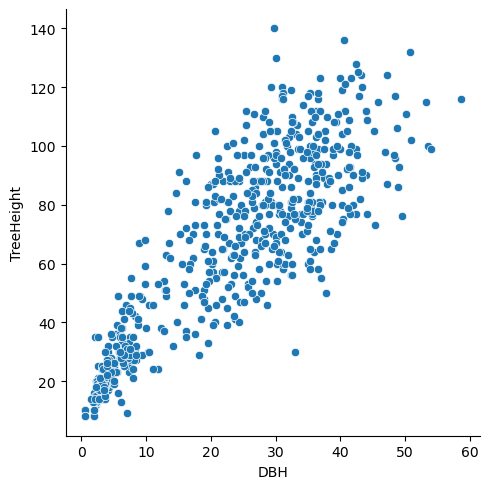

In [16]:
# Graph 1: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis and tree height mapped to the y-axis
graph_1 = sns.relplot(x="DBH", y="TreeHeight", data=ulmus)

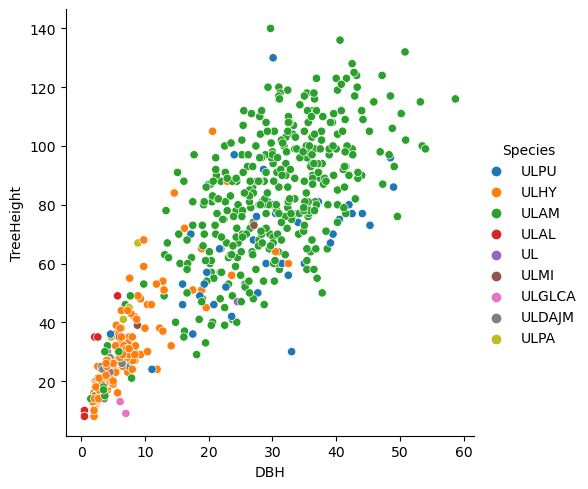

In [17]:
# Graph 2: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis, tree height mapped to the y-axis, and tree species mapped to hue
graph_2 = sns.relplot(x="DBH", y="TreeHeight", hue="Species", data=ulmus)

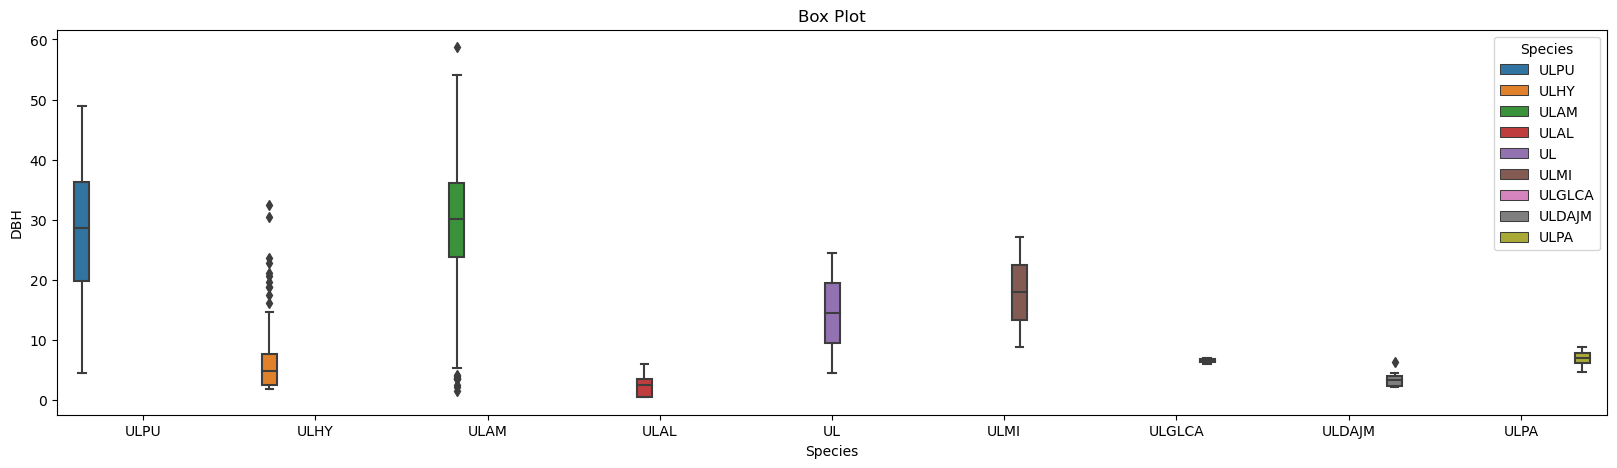

In [18]:
# Graph 3: Create a boxplot of DBH for just the Ulmus genus differentiated by species (or, each species should have its own boxplot)
plt.figure(figsize=(20, 5))
graph_3 = sns.boxplot(data=ulmus, x='Species', y='DBH', hue='Species')
plt.title('Box Plot')
plt.show(graph_3)

In [ ]:
# Graph 4: Combine Graphs 1 and 3 into a single figure
???